In this lab, we'll implement a CNN using Keras for handwritten digit recognition, working with the MNIST dataset. The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits (0-9), where each image is a 28x28 pixel square, widely used for training and testing machine learning models for image classification and computer vision tasks.

1. Load the MNIST dataset from Keras, splitting it into training and testing sets, and print the shapes of the features (X) and target variables (y) for both sets:

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


2. **Reshape**: Convert the $60000x28x28$ dataset to $60000x28x28x1$ tensor.

In [ ]:
x_train_vec = x_train.reshape((60000, 28, 28, 1))/255.0
x_test_vec = x_test.reshape((10000, 28, 28, 1))/255.0
print("Shape of x_train_vec is :", x_train_vec.shape)
print("Shape of x_test_vec is :", x_test_vec.shape)

Shape of x_train_vec is : (60000, 28, 28, 1)
Shape of x_test_vec is : (10000, 28, 28, 1)


3. **One-hot encode**: Convert the labels (an integer in {0,1,..., 9}) to 10-dims vectors.

In [ ]:
import numpy as np
def to_one_hot(labels, dimension = 10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)
print("Shape of y_train_vec is :", y_train_vec.shape)

Shape of y_train_vec is : (60000, 10)


4. Partition the training set to trainign and validation sets.

In [ ]:
rand_indeces = np.random.permutation(60000)
train_indeces = rand_indeces[:50000]
val_indeces = rand_indeces[50000:]

x_valid_vec = x_train_vec[val_indeces]
y_val_vec = y_train_vec[val_indeces]

x_train_vec = x_train_vec[train_indeces]
y_train_vec = y_train_vec[train_indeces]

print("Shape of x_train_vec is :", x_train_vec.shape)
print("Shape of y_train_vec is :", y_train_vec.shape)
print("Shape of x_valid_vec is :", x_valid_vec.shape)
print("Shape of y_val_vec is :", y_val_vec.shape)

Shape of x_train_vec is : (50000, 28, 28, 1)
Shape of y_train_vec is : (50000, 10)
Shape of x_valid_vec is : (10000, 28, 28, 1)
Shape of y_val_vec is : (10000, 10)


5. Now, we need to build the CNN.
![](https://drive.google.com/uc?export=view&id=1xIE0quboBhbNkqKhpHzMKwjDfGAvyE6B)


In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(10, (5,5), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(20, (5,5), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(10, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 10)          │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 20)            │           5,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          32,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

6. Specify the optimization algorithm, learning rate(LR), loss function, and metric.

In [ ]:
from keras import optimizers
model.compile(optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

7. Train the model. Dont forget to specify the batch sieze and the number of epochs (1 epoch = 1 pass over the data).

In [ ]:
history = model.fit(x_train_vec, y_train_vec, epochs=50, batch_size=128, validation_data=(x_valid_vec, y_val_vec))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5207 - loss: 1.8069 - val_accuracy: 0.8585 - val_loss: 0.5267
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8706 - loss: 0.4588 - val_accuracy: 0.9077 - val_loss: 0.3183
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9156 - loss: 0.2875 - val_accuracy: 0.9284 - val_loss: 0.2415
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9354 - loss: 0.2240 - val_accuracy: 0.9431 - val_loss: 0.1958
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9460 - loss: 0.1815 - val_accuracy: 0.9483 - val_loss: 0.1717
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9548 - loss: 0.1526 - val_accuracy: 0.9572 - val_loss: 0.1461
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9597 - loss: 0.1306 - val_accuracy: 0.9635 - val_loss: 0.1283
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9644 - loss: 0.1193 - val_accuracy: 

8. Now, we are ready to examine the results. We can plot the accuracy against the number of epochs for both the training set and valiation set.

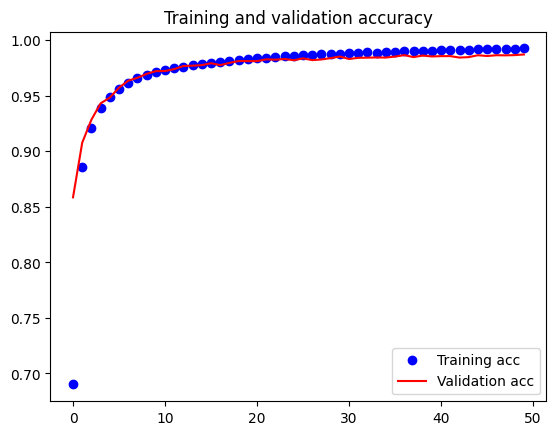

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(50)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


9. Evaluate the model on the test set.

In [ ]:
loss_and_acc = model.evaluate(x_test_vec, y_test_vec)
print("Test loss is :", loss_and_acc[0])
print("Test accuracy is :", loss_and_acc[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0458
Test loss is : 0.03547028452157974
Test accuracy is : 0.987500011920929
